# I. PCA
Dalam tugas ini anda akan membandingkan 2 macam representasi linear dari dataset happines index pada tahun 2015. World Happiness report adalah survey yang dilakukan untuk mengukur tingkat kebahagiaan penduduk dari setiap negara. Data survey tersebut dapat dilihat melalui file berikut.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

df = pd.read_csv('2015.csv')
print(df.columns)
df

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


### Melabeli Data
Buatlah variabel label dimana label yang dipilih adalah fitur region dengan menggunakan OrdinalEncoder. Lalu buatlah variabel fitur dimana fitur yang dipilih adalah fitur numerik dari dataset tersebut

In [2]:
numerical_ix = df.select_dtypes(include = ['int64', 'float64']).columns
X = df[numerical_ix]
y = df[['Region']]
enc = OrdinalEncoder()
y = enc.fit_transform(y)
enc.categories_[0]

array(['Australia and New Zealand', 'Central and Eastern Europe',
       'Eastern Asia', 'Latin America and Caribbean',
       'Middle East and Northern Africa', 'North America',
       'Southeastern Asia', 'Southern Asia', 'Sub-Saharan Africa',
       'Western Europe'], dtype=object)

### Standardisasi
Gunakan StandardScaler untuk melakukan standardisasi pada setiap fitur

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.72099989,  1.93736005, -0.80592569, ...,  2.30965159,
         0.47103971,  0.75825809],
       [-1.69907456,  1.91458063,  0.05588945, ..., -0.01647953,
         1.57585637,  1.09285682],
       [-1.67714922,  1.88479215, -0.8544869 , ...,  2.8427738 ,
         0.8242928 ,  0.71233526],
       ...,
       [ 1.67742676, -2.0761992 ,  0.13253425, ...,  0.38141902,
         1.85689094, -3.20843049],
       [ 1.69935209, -2.1646885 ,  2.26396166, ..., -0.35771452,
        -0.31694987, -0.48198451],
       [ 1.72127743, -2.22251319,  1.13418227, ..., -0.30180313,
        -0.5581534 , -0.96361241]])

### PCA
Gunakan metode Principal Component Analysis (PCA) untuk menemukan representasi 2 dimensi utama dari seluruh data numerik (yang terstandardisasi) lalu hitung variance explained ratio dari 2 komponen ini.

In [4]:
pca = PCA(n_components=10)
pca.fit(X)
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([4.70639536e-01, 1.48604120e-01, 1.20244402e-01, 8.49771943e-02,
       7.04233769e-02, 5.08815496e-02, 3.84420499e-02, 1.47369155e-02,
       1.05085192e-03, 3.83505579e-09])

### Biplot
Buatlah biplot dengan memproyeksikan data dan fitur numerik (yang terstandarisasi) menuju principal component diatas. Gunakan warna yang berbeda untuk region yang berbeda.

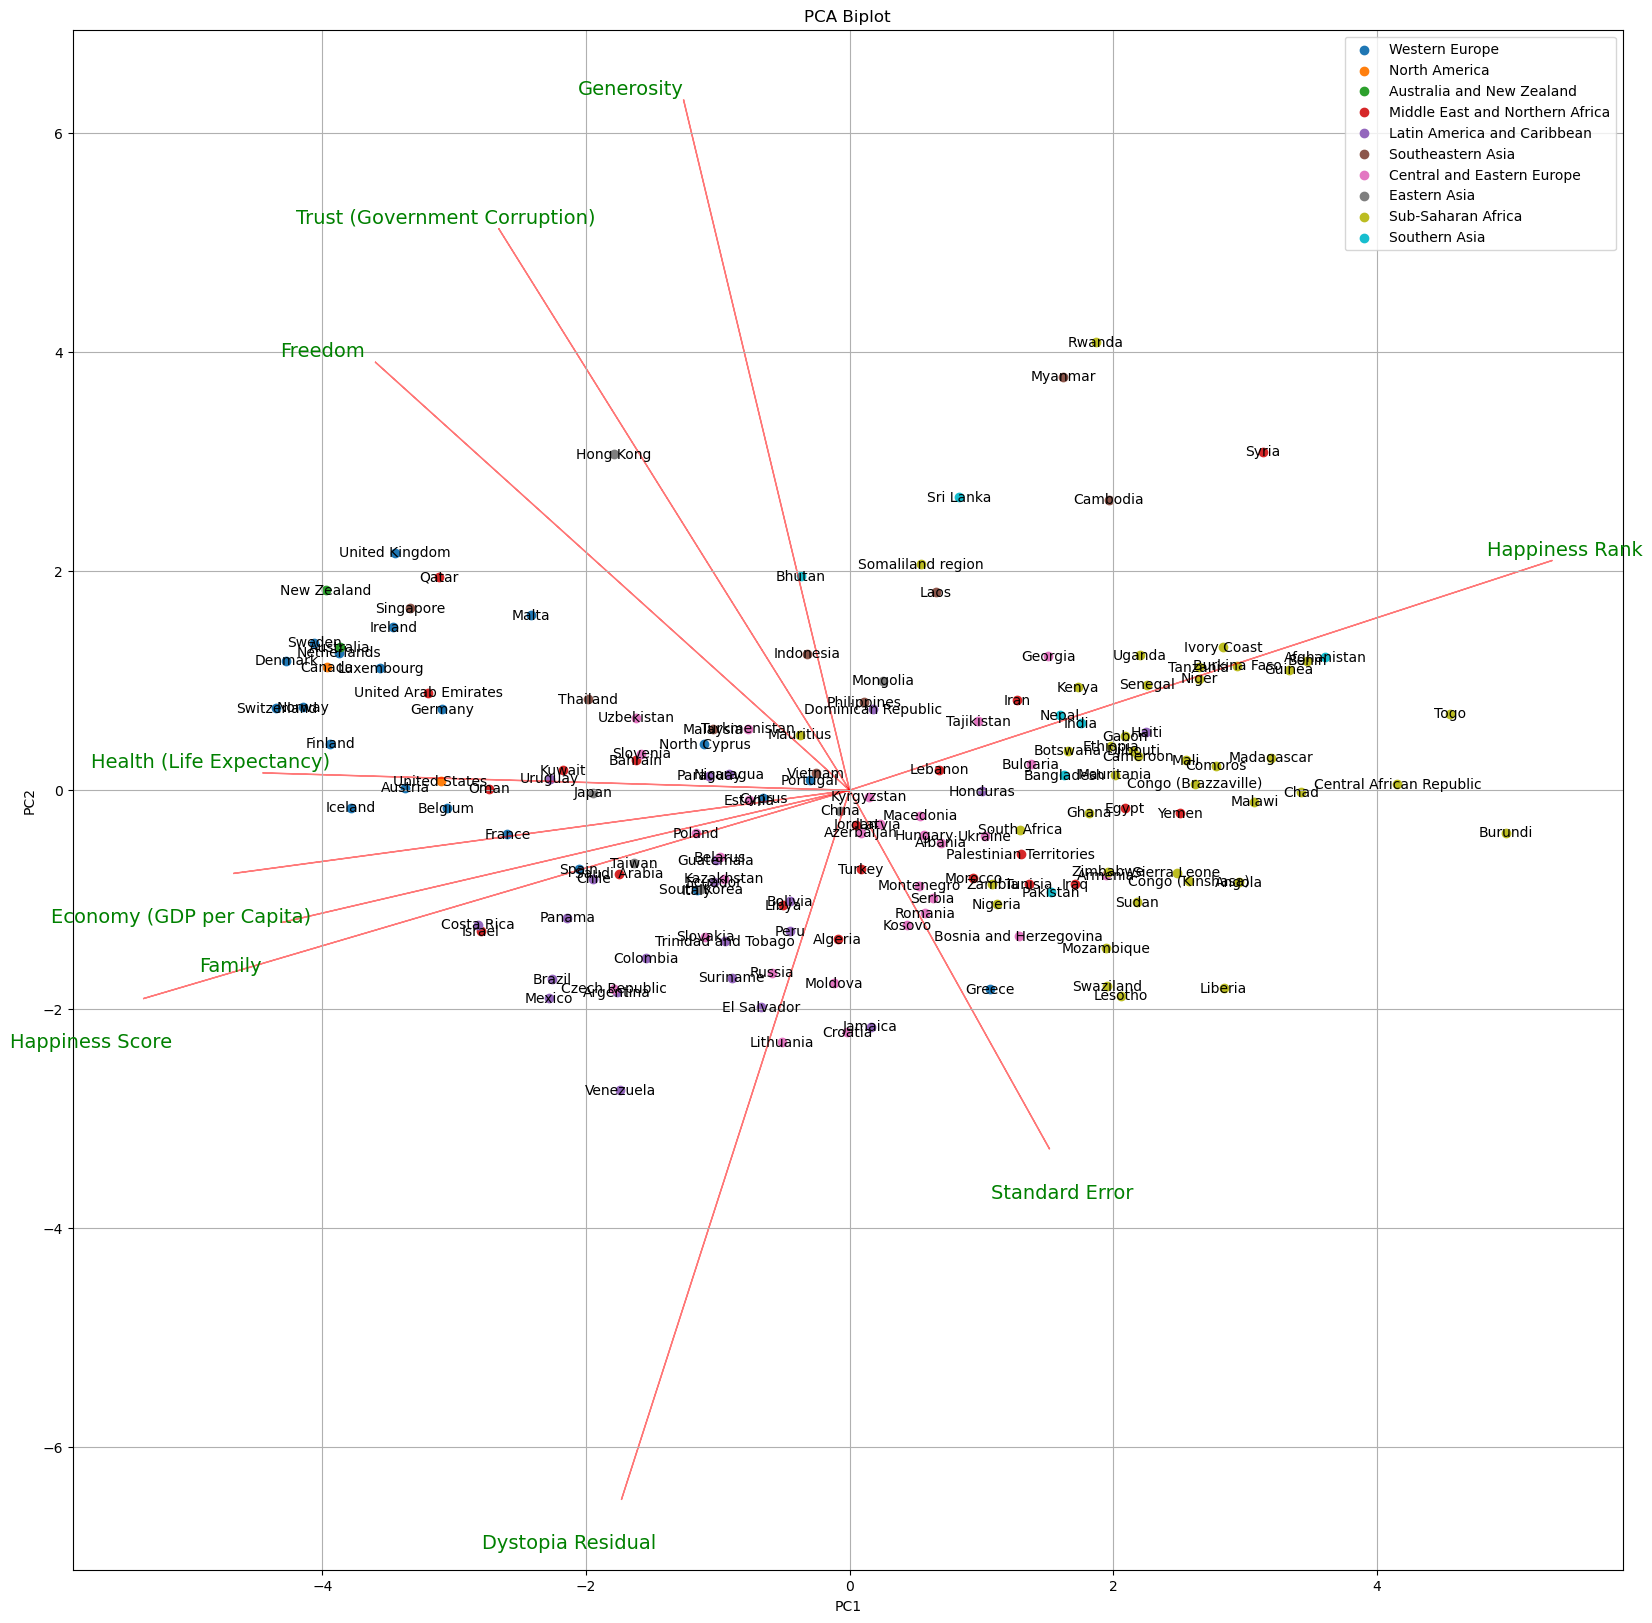

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

fig, ax = plt.subplots(figsize=(20, 20))
for region in df['Region'].unique():
    ax.scatter(X_pca[df['Region'] == region, 0], X_pca[df['Region'] == region, 1], label=region, alpha=1)

scaling_factor = 12
for i, (x, y) in enumerate(pca.components_.T * scaling_factor):
    ax.arrow(0, 0, x, y, color='r', alpha=0.5)
    offset_x = 0.1 if x > 0 else -0.4
    offset_y = 0.1 if y > 0 else -0.4
    ax.text(x+offset_x, y+offset_y, df.columns[i+2], color='g', ha='center', va='center', fontsize=14)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA Biplot')
ax.legend()

for i, country in enumerate(df['Country']):
    ax.text(X_pca[i, 0], X_pca[i, 1], country, ha='center', va='center', fontsize=10)

ax.grid(True)
plt.show()

### Loading dan Score
Analisa loading dan score pada biplot tersebut. Bagaimana pola persebaran region yang berbeda. Dimanakah posisi indonesia relatif terhadap negara lain?

# II.LDA

Gunakan metode Linear Discriminant Analysis (LDA) untuk menemukan representasi 2 dimensi utama dari seluruh data numerik (yang terstandardisasi)

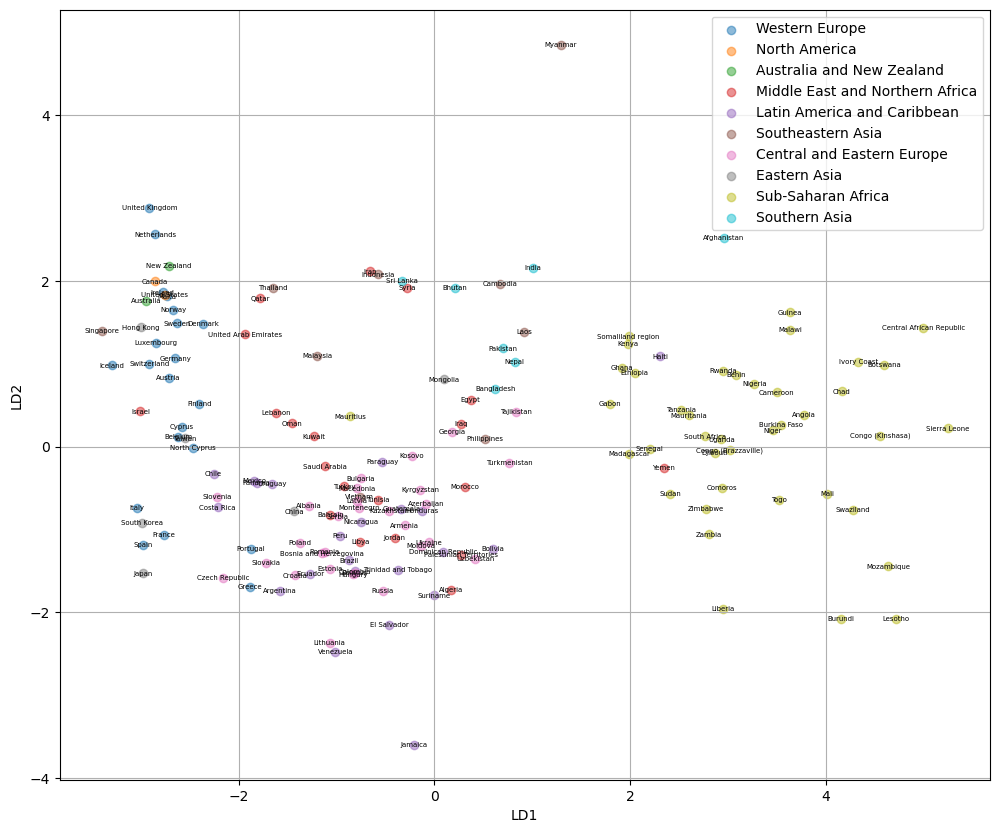

In [11]:


# Instantiate and fit LDA with 2 components
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, df['Region'])

# Create a scatter plot of the projected data
fig, ax = plt.subplots(figsize=(12, 10))
for region in df['Region'].unique():
    mask = (df['Region'] == region)
    ax.scatter(X_lda[mask, 0], X_lda[mask, 1], label=region, alpha=0.5)

    # Add country labels to the plot
    for i, country in enumerate(df.loc[mask, 'Country']):
        ax.text(X_lda[mask, 0][i], X_lda[mask, 1][i], country, fontsize=5, ha='center', va='center')

ax.set_xlabel('LD1')
ax.set_ylabel('LD2')
# ax.set_title('LDA Projection')
ax.legend()
ax.grid(True)
plt.show()


### Kesimpulan
Bandingkan hasil proyeksi LDA dengan hasil proyeksi PCA dari region yang berbeda